<a href="https://colab.research.google.com/github/aunraza19/ANN-Lab-Tasks/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

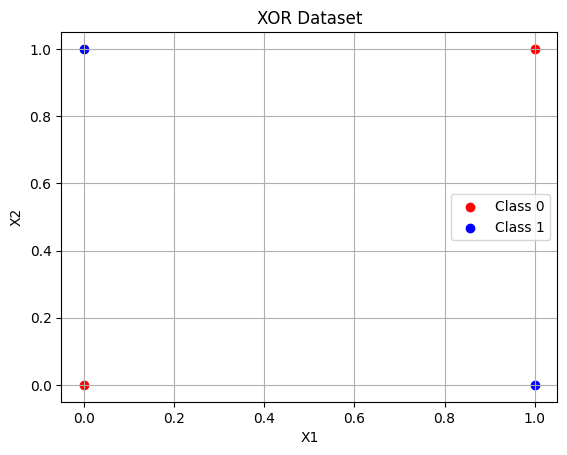

In [ ]:
# Task 1 Shallow Neural Network for XOR:
import numpy as np
import matplotlib.pyplot as plt

# XOR data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Visualize the XOR points
plt.scatter(X[y[:,0]==0][:,0], X[y[:,0]==0][:,1], color="red", label="Class 0")
plt.scatter(X[y[:,0]==1][:,0], X[y[:,0]==1][:,1], color="blue", label="Class 1")
plt.title("XOR Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

np.random.seed(1)
input_size = 2
output_size = 1

# Initialize weights for input->output layer
weights = 2 * np.random.random((input_size, output_size)) - 1

# Train
epochs = 10000
losses = []
for epoch in range(epochs):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    error = y - y_pred
    loss = np.mean(np.square(error))
    losses.append(loss)
    adjustments = error * sigmoid_derivative(y_pred)
    weights += np.dot(X.T, adjustments)

print(f"Final predictions (rounded): {np.round(y_pred.T)}")

Final predictions (rounded): [[0. 0. 0. 0.]]


Accuracy of shallow network: 50.00%


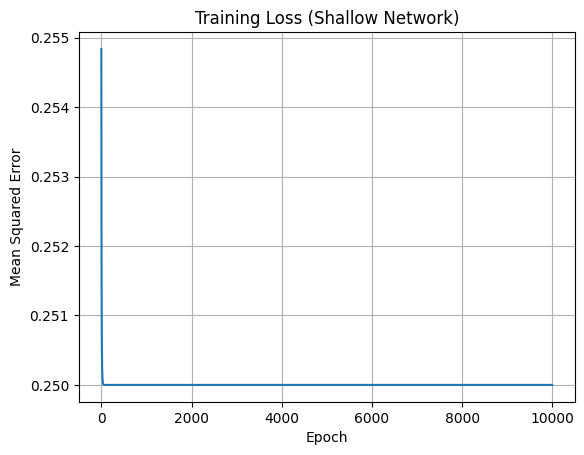

In [ ]:
# Task 2 Evaluate the Shallow Network:def sigmoid(x):
from sklearn.metrics import accuracy_score

y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y, y_pred_binary)
print(f"Accuracy of shallow network: {accuracy*100:.2f}%")

# Plot loss over epochs
plt.plot(losses)
plt.title("Training Loss (Shallow Network)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


In [ ]:
# Task 3 Deep Neural Network (One Hidden Layer with ReLU):
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return (x > 0).astype(float)

np.random.seed(1)
hidden_size = 2

# Initialize weights
weights_input_hidden = 2 * np.random.random((input_size, hidden_size)) - 1
weights_hidden_output = 2 * np.random.random((hidden_size, output_size)) - 1

losses_deep = []
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden)
    hidden_output = relu(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output)
    y_pred_deep = sigmoid(final_input)

    # Compute error
    error = y - y_pred_deep
    loss = np.mean(np.square(error))
    losses_deep.append(loss)

    # Backpropagation
    d_output = error * sigmoid_derivative(y_pred_deep)
    d_hidden = np.dot(d_output, weights_hidden_output.T) * relu_derivative(hidden_output)

    # Update weights
    weights_hidden_output += np.dot(hidden_output.T, d_output)
    weights_input_hidden += np.dot(X.T, d_hidden)

print(f"Final predictions (rounded): {np.round(y_pred_deep.T)}")


Final predictions (rounded): [[0. 0. 0. 0.]]


Accuracy of deep network: 50.00%


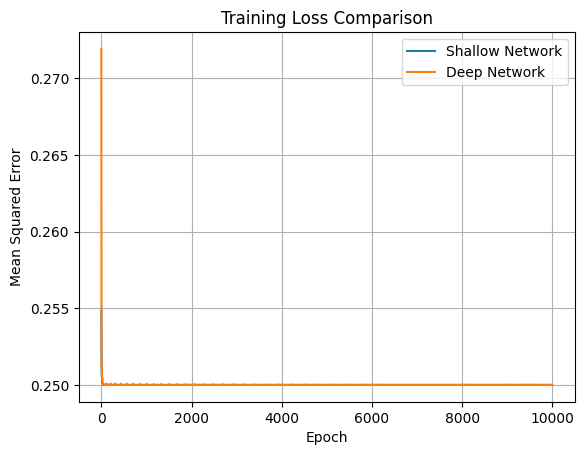

In [ ]:
# Task 4 Compare & Analyze Performance:
y_pred_deep_binary = np.round(y_pred_deep)
accuracy_deep = accuracy_score(y, y_pred_deep_binary)
print(f"Accuracy of deep network: {accuracy_deep*100:.2f}%")

# Plot both loss curves
plt.plot(losses, label="Shallow Network")
plt.plot(losses_deep, label="Deep Network")
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()
